In [17]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
input_folder = '../data/'

In [19]:
df = pd.read_csv(input_folder + 'train.csv')

In [66]:
def check_completness(df, cols_str, null_str = ['nan', 'null', 'none']):
    # List of columns to be treated as strings
    #cols_str = ['Cabin', 'Embarked', 'Ticket', 'Sex', 'Name']
    nrow = df.shape[0]
    df_complete = dict()
    null_cnt = np.zeros(nrow) # count number of empty items in each row
    for col in df.columns:
        mask_null = list(pd.isnull(df[col]))
        
        mask_missing = mask_null
        # Check strings for being empty
        if col in cols_str:
            df[col] = df[col].astype(str)
            df[col] = df[col].apply(lambda x: x.strip(' \t\n\r'))
            mask_empty = list(df[col].apply(lambda x: len(x)))
            df[col] = df[col].apply(lambda x: np.nan if x.lower() in null_str else x)
            mask_missing = mask_missing or mask_empty or list(pd.isnull(df[col]))
                            
        null_cnt+= np.array(mask_missing)
        
        df_complete[col] = (1.0 - sum(mask_missing)/nrow) * 100.0
    # Data frame with percentage of completness
    df_complete = pd.DataFrame(df_complete, index=[0])
    # Count rows with various numbers of null columns
    null_items_per_row = pd.Series.value_counts(null_cnt)

    df_null_cols_cnt = pd.DataFrame({'count':null_items_per_row, 'fraction':null_items_per_row/nrow})
    df_null_cols_cnt = df_null_cols_cnt.reset_index(drop=True)
    return (df_complete, df_null_cols_cnt, df[null_cnt > 0], df)

In [67]:
df_compleness, df_null_per_row, df_null, _ = check_completness(df, cols_str=['Cabin', 'Embarked', 'Ticket', 'Sex', 'Name'])

2.0


In [63]:
df_null

PassengerId  Survived  Pclass  \
0              1         0       3   
2              3         1       3   
4              5         0       3   
5              6         0       3   
7              8         0       3   
8              9         1       3   
9             10         1       2   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
22            23         1       3   
24            25         0       3   
25            26         1       3   
26            27         0       3   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32            33         1       3   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
..           ...       ...     ...   
852          853         0       3   
854          855         0       2   
855          856         1       3   
856          857         1       1   
858          859         1       3   
859          860         0       3   
860          861         0       3   
861          862         0       2   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
868          869         0       3   
869          870         1       3   
870          871         0       3   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
888          889         0       3   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                     Hewlett, Mrs. (Mary D Kingcome)  female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN      0   
20                                Fynney, Mr. Joseph J    male  35.0      0   
22                         McGowan, Miss. Anna "Annie"  female  15.0      0   
24                       Palsson, Miss. Torborg Danira  female   8.0      3   
25   Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
26                             Emir, Mr. Farred Chehab    male   NaN

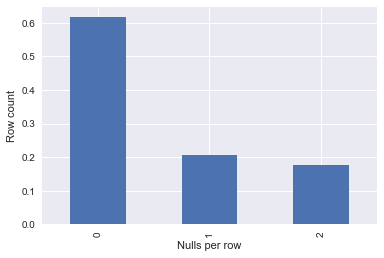

In [72]:
# PLOT: Count rows with different number of nulls per row
ax = df_null_per_row['fraction'].plot.bar();
ax.set(xlabel='Nulls per row', ylabel='Row count');

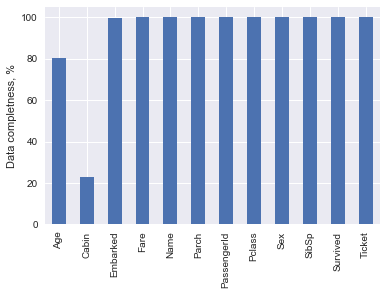

In [73]:
# PLOT: Count nulls in each column
ax = (df_compleness.T).plot.bar(legend=False);
ax.set(ylabel='Data completness, %');